In [1]:
import numpy as np
import torch
import torchaudio
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'torch'

In [2]:
PATH = '../data/Crema/1001_DFA_ANG_XX.wav'
waveform, sample_rate = torchaudio.load(PATH)

In [3]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")

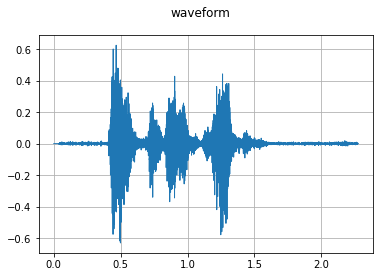

In [4]:
plot_waveform(waveform, sample_rate)

In [17]:
wv_arr = waveform.numpy()[0]
wv_arr.shape

(36409,)

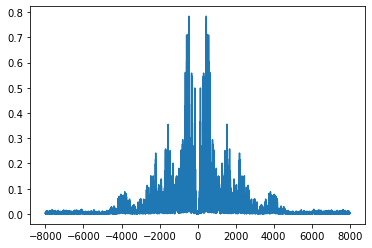

In [18]:
fft = np.fft.fft(wv_arr, norm='ortho')
fs_shifted = np.linspace(-len(fft) // 2, len(fft) // 2, len(fft)) * sample_rate / len(fft)

plt.plot(fs_shifted, np.abs(np.fft.fftshift(fft)))
plt.show()

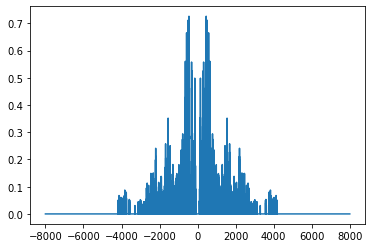

In [22]:
peak_thres = fft.copy()
peak_thres[peak_thres < 0.03] = 0

plt.plot(fs_shifted, np.abs(np.fft.fftshift(peak_thres)))